cifar-10 images sre 32X32 pixels 
vgg get 224X224 pixels.
make sure to upsample

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.
The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

Loaded in this way, each of the batch files contains a dictionary with the following elements:

data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

labels -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5870366..2.3785603].


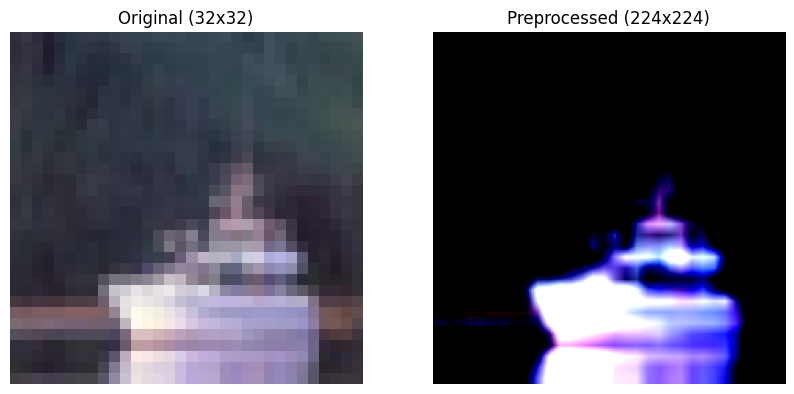

In [8]:
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Add the src directory to the system path
sys.path.append(os.path.abspath("../src"))

from preprocessing import preprocess_image_for_vgg16
from preprocessing import preprocess_image_for_vgg16
from utils import unpickle

# === Constants ===
DATA_DIR = r"D:\CIFAR-10\cifar-10-python\cifar-10-batches-py"
TARGET_SIZE = (224, 224)

# === Visualization of Preprocessing ===


def visualize_preprocessing(data_dir, target_size):
    """
    Visualize the preprocessing of a CIFAR-10 image:
    - Original (32x32)
    - Preprocessed (224x224)

    Args:
        data_dir: Path to the CIFAR-10 dataset directory.
        target_size: Desired image size after preprocessing.
    """
    # Load a batch
    batch_path = os.path.join(data_dir, "data_batch_1")
    batch = unpickle(batch_path)

    # Get a random image and its label
    images, labels = batch[b"data"], batch[b"labels"]
    random_idx = np.random.randint(0, len(images))

    # Preprocess the image
    raw_image = (
        images[random_idx].reshape(3, 32, 32).transpose(1, 2, 0).astype(np.float32)
        / 255.0
    )
    processed_image = preprocess_image_for_vgg16(images[random_idx], target_size)

    # Plot the original and preprocessed images
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(raw_image)
    plt.title("Original (32x32)")
    plt.axis("off")

    # Preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image.numpy())  # Convert TensorFlow tensor to NumPy array
    plt.title("Preprocessed (224x224)")
    plt.axis("off")

    plt.show()


# Run the visualization
visualize_preprocessing(DATA_DIR, TARGET_SIZE)